In [1]:
#importing necessary librabries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence  import variance_inflation_factor
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing Dataset /Read csv file
data=pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
#print summary
print('shape---------------->',data.shape)
print('Each column and datatype and its count','\n')
print(data.info())

shape----------------> (1470, 35)
Each column and datatype and its count 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  Job

.There are 1470 rows and 35 columns in this Dataset.In which, Attrition column is label nd rests are features.            

In [4]:
#Dataframe statics
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [5]:
#To get count of categorical columb
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

.Not-Null counts of all the column is 0. so,Their is no not null value.                       

In [6]:
#As we have Categorical column(Attrition,BussinessTravel,Department,EduacationField).so,we need to convert into numeric data using encoding method 
from sklearn.preprocessing import OrdinalEncoder

In [7]:
#Encoded BussinessTravel
ord_encoder=OrdinalEncoder(categories=[['Travel_Rarely','Travel_Frequently','Non-Travel']])
df1=ord_encoder.fit_transform(data[['BusinessTravel']])
df1

array([[0.],
       [1.],
       [0.],
       ...,
       [0.],
       [1.],
       [0.]])

In [8]:
#Encoded Department
ord_encoder=OrdinalEncoder(categories=[['Sales','Research & Development','Human Resources']])
df2=ord_encoder.fit_transform(data[['Department']])
df2

array([[0.],
       [1.],
       [1.],
       ...,
       [1.],
       [0.],
       [1.]])

In [9]:
#Encoded EducationField
ord_encoder=OrdinalEncoder(categories=[['Life Sciences','Other','Medical','Human Resources','Marketing','Technical Degree']])
df3=ord_encoder.fit_transform(data[['EducationField']])
df3

array([[0.],
       [0.],
       [1.],
       ...,
       [0.],
       [2.],
       [2.]])

In [10]:
#Encoded Gender
ord_encoder=OrdinalEncoder(categories=[['Male','Female']])
df4=ord_encoder.fit_transform(data[['Gender']])
df4

array([[1.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [11]:
#Encoded JobRole
ord_encoder=OrdinalEncoder(categories=[['Laboratory Technician','Manufacturing Director','Sales Executive','Research Director','Healthcare Representative','Sales Representative','Research Scientist','Human Resources','Manager']])
df5=ord_encoder.fit_transform(data[['JobRole']])
df5

array([[2.],
       [6.],
       [0.],
       ...,
       [1.],
       [2.],
       [0.]])

In [12]:
#Encoded MaritalStatus
ord_encoder=OrdinalEncoder(categories=[['Single','Married','Divorced']])
df6=ord_encoder.fit_transform(data[['MaritalStatus']])
df6

array([[0.],
       [1.],
       [0.],
       ...,
       [1.],
       [1.],
       [1.]])

In [13]:
#Encoded Over18
ord_encoder=OrdinalEncoder(categories=[['Y','N']])
df7=ord_encoder.fit_transform(data[['Over18']])
df7

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [14]:
#Encoded OverTime
ord_encoder=OrdinalEncoder(categories=[['Yes','No']])
df8=ord_encoder.fit_transform(data[['OverTime']])
df8

array([[0.],
       [1.],
       [0.],
       ...,
       [0.],
       [1.],
       [1.]])

In [15]:
#Encoded Attrition
ord_encoder=OrdinalEncoder(categories=[['Yes','No']])
df9=ord_encoder.fit_transform(data[['Attrition']])
df9

array([[0.],
       [1.],
       [0.],
       ...,
       [1.],
       [1.],
       [1.]])

In [16]:
#Override these column with the dataset
data['BusinessTravel']=df1
data['Department']=df2
data['EducationField']=df3
data['Gender']=df4
data['JobRole']=df5
data['MaritalStatus']=df6
data['Over18']=df7
data['OverTime']=df8
data['Attrition']=df9
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,0.0,0.0,1102,0.0,1,2,0.0,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,1.0,1.0,279,1.0,8,1,0.0,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,0.0,0.0,1373,1.0,2,2,1.0,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,1.0,1.0,1392,1.0,3,4,0.0,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,1.0,0.0,591,1.0,2,1,2.0,1,7,...,4,80,1,6,3,3,2,2,2,2


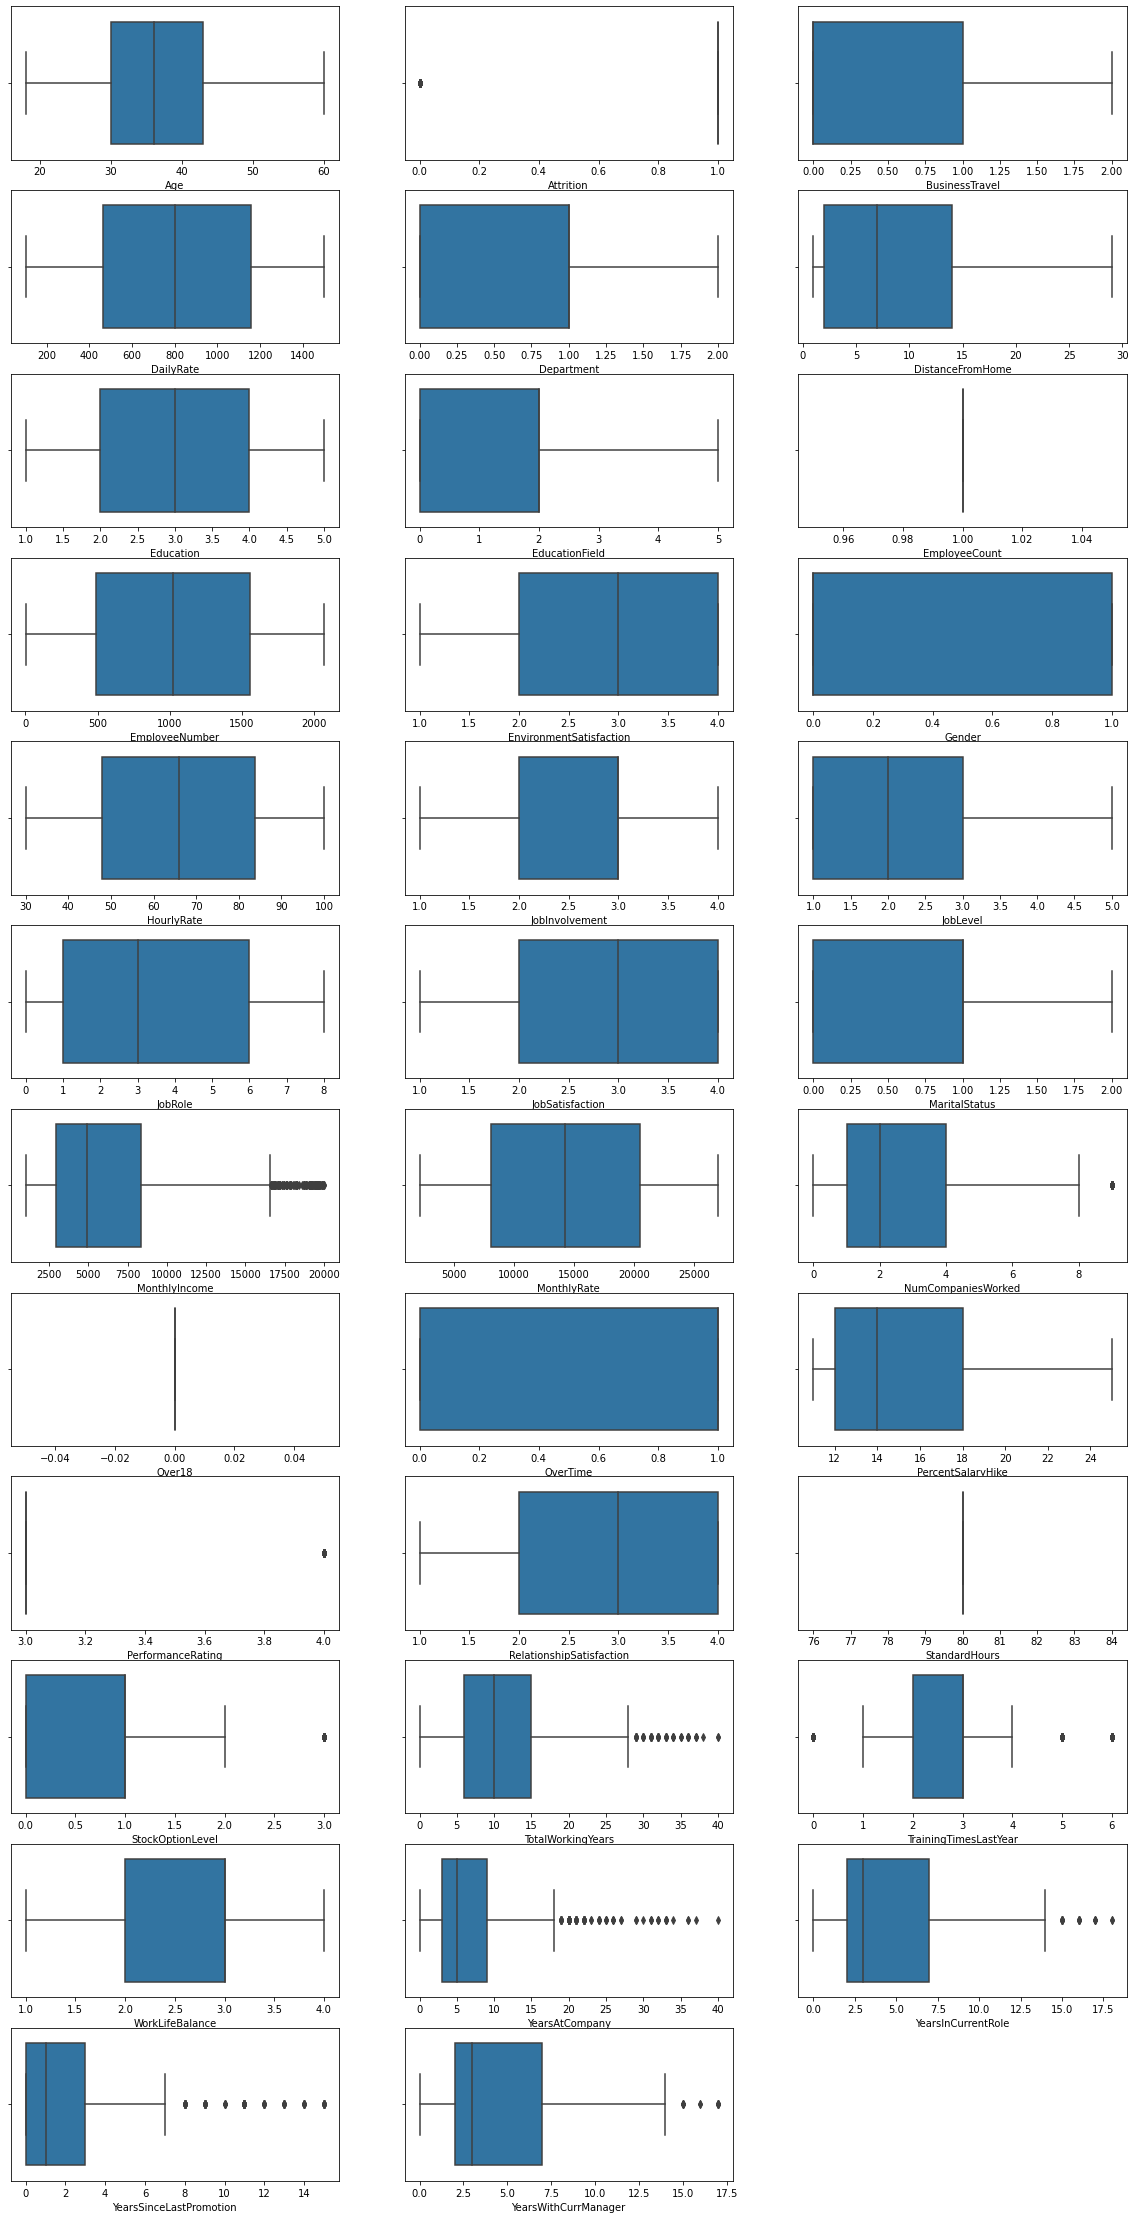

In [18]:
#To check skewness using boxplot nd IQR
plt.figure(figsize=(20,40))
graph=1
for column in data:
    if graph <=36:
        ax=plt.subplot(12,3,graph)
        sns.boxplot(data[column],orient='v')
        plt.xlabel(column,fontsize=10)
    graph+=1
plt.show()    

.We found skewness in the column i.e.MonthlyIncome,NumCompaniesWorked,StockOptionalLevel,TotalWorkingYears,TrainingTimeLastYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager.so, we were going to remove skewness using IQR.                   

In [20]:
#Finding the IQR
#1st quantile
q1=data.quantile(0.25)

#3rd Quantile
q3=data.quantile(0.75)

#IQR
iqr=q3-q1

In [21]:
#Removing Higher side outliers of MonthlyIncome.
index=np.where(data['MonthlyIncome'] >(q3.MonthlyIncome + (1.5*iqr.MonthlyIncome)))
data=data.drop(data.index[index])
data.reset_index(drop=True)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,0.0,0.0,1102,0.0,1,2,0.0,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,1.0,1.0,279,1.0,8,1,0.0,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,0.0,0.0,1373,1.0,2,2,1.0,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,1.0,1.0,1392,1.0,3,4,0.0,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,1.0,0.0,591,1.0,2,1,2.0,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1351,36,1.0,1.0,884,1.0,23,2,2.0,1,2061,...,3,80,1,17,3,3,5,2,0,3
1352,39,1.0,0.0,613,1.0,6,1,2.0,1,2062,...,1,80,1,9,5,3,7,7,1,7
1353,27,1.0,0.0,155,1.0,4,3,0.0,1,2064,...,2,80,1,6,0,3,6,2,0,3
1354,49,1.0,1.0,1023,0.0,2,3,2.0,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [22]:
#Removing Higher side outliers of NumCompaniesWorked
index=np.where(data['NumCompaniesWorked'] >(q3.NumCompaniesWorked + (1.5*iqr.NumCompaniesWorked)))
data=data.drop(data.index[index])
data.reset_index(drop=True)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,0.0,0.0,1102,0.0,1,2,0.0,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,1.0,1.0,279,1.0,8,1,0.0,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,0.0,0.0,1373,1.0,2,2,1.0,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,1.0,1.0,1392,1.0,3,4,0.0,1,5,...,3,80,0,8,3,3,8,7,3,0
4,32,1.0,1.0,1005,1.0,2,2,0.0,1,8,...,3,80,0,8,2,2,7,7,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,36,1.0,1.0,884,1.0,23,2,2.0,1,2061,...,3,80,1,17,3,3,5,2,0,3
1305,39,1.0,0.0,613,1.0,6,1,2.0,1,2062,...,1,80,1,9,5,3,7,7,1,7
1306,27,1.0,0.0,155,1.0,4,3,0.0,1,2064,...,2,80,1,6,0,3,6,2,0,3
1307,49,1.0,1.0,1023,0.0,2,3,2.0,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [23]:
#Removing Higher side outliers of StockOptionLevel
index=np.where(data['StockOptionLevel'] >(q3.StockOptionLevel + (1.5*iqr.StockOptionLevel)))
data=data.drop(data.index[index])
data.reset_index(drop=True)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,0.0,0.0,1102,0.0,1,2,0.0,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,1.0,1.0,279,1.0,8,1,0.0,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,0.0,0.0,1373,1.0,2,2,1.0,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,1.0,1.0,1392,1.0,3,4,0.0,1,5,...,3,80,0,8,3,3,8,7,3,0
4,32,1.0,1.0,1005,1.0,2,2,0.0,1,8,...,3,80,0,8,2,2,7,7,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1227,36,1.0,1.0,884,1.0,23,2,2.0,1,2061,...,3,80,1,17,3,3,5,2,0,3
1228,39,1.0,0.0,613,1.0,6,1,2.0,1,2062,...,1,80,1,9,5,3,7,7,1,7
1229,27,1.0,0.0,155,1.0,4,3,0.0,1,2064,...,2,80,1,6,0,3,6,2,0,3
1230,49,1.0,1.0,1023,0.0,2,3,2.0,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [24]:
#Removing Higher side outliers of TotalWorkingYears
index=np.where(data['TotalWorkingYears'] >(q3.TotalWorkingYears + (1.5*iqr.TotalWorkingYears)))
data=data.drop(data.index[index])
data.reset_index(drop=True)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,0.0,0.0,1102,0.0,1,2,0.0,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,1.0,1.0,279,1.0,8,1,0.0,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,0.0,0.0,1373,1.0,2,2,1.0,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,1.0,1.0,1392,1.0,3,4,0.0,1,5,...,3,80,0,8,3,3,8,7,3,0
4,32,1.0,1.0,1005,1.0,2,2,0.0,1,8,...,3,80,0,8,2,2,7,7,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1199,36,1.0,1.0,884,1.0,23,2,2.0,1,2061,...,3,80,1,17,3,3,5,2,0,3
1200,39,1.0,0.0,613,1.0,6,1,2.0,1,2062,...,1,80,1,9,5,3,7,7,1,7
1201,27,1.0,0.0,155,1.0,4,3,0.0,1,2064,...,2,80,1,6,0,3,6,2,0,3
1202,49,1.0,1.0,1023,0.0,2,3,2.0,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [25]:
#Removing Higher side outliers of TrainingTimesLastYear
index=np.where(data['TrainingTimesLastYear'] >(q3.TrainingTimesLastYear + (1.5*iqr.TrainingTimesLastYear)))
data=data.drop(data.index[index])
data.reset_index(drop=True)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,0.0,0.0,1102,0.0,1,2,0.0,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,1.0,1.0,279,1.0,8,1,0.0,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,0.0,0.0,1373,1.0,2,2,1.0,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,1.0,1.0,1392,1.0,3,4,0.0,1,5,...,3,80,0,8,3,3,8,7,3,0
4,32,1.0,1.0,1005,1.0,2,2,0.0,1,8,...,3,80,0,8,2,2,7,7,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1041,26,1.0,0.0,1167,0.0,5,3,1.0,1,2060,...,4,80,0,5,2,3,4,2,0,0
1042,36,1.0,1.0,884,1.0,23,2,2.0,1,2061,...,3,80,1,17,3,3,5,2,0,3
1043,27,1.0,0.0,155,1.0,4,3,0.0,1,2064,...,2,80,1,6,0,3,6,2,0,3
1044,49,1.0,1.0,1023,0.0,2,3,2.0,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [26]:
#Removing Lower side outliers of TrainingTimesLastYear
index=np.where(data['TrainingTimesLastYear'] < (q1.TrainingTimesLastYear - (1.5*iqr.TrainingTimesLastYear)))
data=data.drop(data.index[index])
data.reset_index(drop=True)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,49,1.0,1.0,279,1.0,8,1,0.0,1,2,...,4,80,1,10,3,3,10,7,1,7
1,37,0.0,0.0,1373,1.0,2,2,1.0,1,4,...,2,80,0,7,3,3,0,0,0,0
2,33,1.0,1.0,1392,1.0,3,4,0.0,1,5,...,3,80,0,8,3,3,8,7,3,0
3,32,1.0,1.0,1005,1.0,2,2,0.0,1,8,...,3,80,0,8,2,2,7,7,3,6
4,30,1.0,0.0,1358,1.0,24,1,0.0,1,11,...,2,80,1,1,2,3,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
997,31,1.0,2.0,325,1.0,5,3,2.0,1,2057,...,2,80,0,10,2,3,9,4,1,7
998,26,1.0,0.0,1167,0.0,5,3,1.0,1,2060,...,4,80,0,5,2,3,4,2,0,0
999,36,1.0,1.0,884,1.0,23,2,2.0,1,2061,...,3,80,1,17,3,3,5,2,0,3
1000,49,1.0,1.0,1023,0.0,2,3,2.0,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [27]:
#Removing Higher side outliers of YearsAtCompany
index=np.where(data['YearsAtCompany'] >(q3.YearsAtCompany + (1.5*iqr.YearsAtCompany)))
data=data.drop(data.index[index])
data.reset_index(drop=True)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,49,1.0,1.0,279,1.0,8,1,0.0,1,2,...,4,80,1,10,3,3,10,7,1,7
1,37,0.0,0.0,1373,1.0,2,2,1.0,1,4,...,2,80,0,7,3,3,0,0,0,0
2,33,1.0,1.0,1392,1.0,3,4,0.0,1,5,...,3,80,0,8,3,3,8,7,3,0
3,32,1.0,1.0,1005,1.0,2,2,0.0,1,8,...,3,80,0,8,2,2,7,7,3,6
4,30,1.0,0.0,1358,1.0,24,1,0.0,1,11,...,2,80,1,1,2,3,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
961,31,1.0,2.0,325,1.0,5,3,2.0,1,2057,...,2,80,0,10,2,3,9,4,1,7
962,26,1.0,0.0,1167,0.0,5,3,1.0,1,2060,...,4,80,0,5,2,3,4,2,0,0
963,36,1.0,1.0,884,1.0,23,2,2.0,1,2061,...,3,80,1,17,3,3,5,2,0,3
964,49,1.0,1.0,1023,0.0,2,3,2.0,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [28]:
#Removing Higher side outliers of YearsInCurrentRole
index=np.where(data['YearsInCurrentRole'] >(q3.YearsInCurrentRole + (1.5*iqr.YearsInCurrentRole)))
data=data.drop(data.index[index])
data.reset_index(drop=True)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,49,1.0,1.0,279,1.0,8,1,0.0,1,2,...,4,80,1,10,3,3,10,7,1,7
1,37,0.0,0.0,1373,1.0,2,2,1.0,1,4,...,2,80,0,7,3,3,0,0,0,0
2,33,1.0,1.0,1392,1.0,3,4,0.0,1,5,...,3,80,0,8,3,3,8,7,3,0
3,32,1.0,1.0,1005,1.0,2,2,0.0,1,8,...,3,80,0,8,2,2,7,7,3,6
4,30,1.0,0.0,1358,1.0,24,1,0.0,1,11,...,2,80,1,1,2,3,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
958,31,1.0,2.0,325,1.0,5,3,2.0,1,2057,...,2,80,0,10,2,3,9,4,1,7
959,26,1.0,0.0,1167,0.0,5,3,1.0,1,2060,...,4,80,0,5,2,3,4,2,0,0
960,36,1.0,1.0,884,1.0,23,2,2.0,1,2061,...,3,80,1,17,3,3,5,2,0,3
961,49,1.0,1.0,1023,0.0,2,3,2.0,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [29]:
#Removing Higher side outliers of YearsSinceLastPromotion
index=np.where(data['YearsSinceLastPromotion'] >(q3.YearsSinceLastPromotion + (1.5*iqr.YearsSinceLastPromotion)))
data=data.drop(data.index[index])
data.reset_index(drop=True)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,49,1.0,1.0,279,1.0,8,1,0.0,1,2,...,4,80,1,10,3,3,10,7,1,7
1,37,0.0,0.0,1373,1.0,2,2,1.0,1,4,...,2,80,0,7,3,3,0,0,0,0
2,33,1.0,1.0,1392,1.0,3,4,0.0,1,5,...,3,80,0,8,3,3,8,7,3,0
3,32,1.0,1.0,1005,1.0,2,2,0.0,1,8,...,3,80,0,8,2,2,7,7,3,6
4,30,1.0,0.0,1358,1.0,24,1,0.0,1,11,...,2,80,1,1,2,3,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
923,31,1.0,2.0,325,1.0,5,3,2.0,1,2057,...,2,80,0,10,2,3,9,4,1,7
924,26,1.0,0.0,1167,0.0,5,3,1.0,1,2060,...,4,80,0,5,2,3,4,2,0,0
925,36,1.0,1.0,884,1.0,23,2,2.0,1,2061,...,3,80,1,17,3,3,5,2,0,3
926,49,1.0,1.0,1023,0.0,2,3,2.0,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [30]:
#Removing Higher side outliers of YearsWithCurrManager        
index=np.where(data['YearsWithCurrManager'] >(q3.YearsWithCurrManager + (1.5*iqr.YearsWithCurrManager)))
data=data.drop(data.index[index])
data.reset_index(drop=True)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,49,1.0,1.0,279,1.0,8,1,0.0,1,2,...,4,80,1,10,3,3,10,7,1,7
1,37,0.0,0.0,1373,1.0,2,2,1.0,1,4,...,2,80,0,7,3,3,0,0,0,0
2,33,1.0,1.0,1392,1.0,3,4,0.0,1,5,...,3,80,0,8,3,3,8,7,3,0
3,32,1.0,1.0,1005,1.0,2,2,0.0,1,8,...,3,80,0,8,2,2,7,7,3,6
4,30,1.0,0.0,1358,1.0,24,1,0.0,1,11,...,2,80,1,1,2,3,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
920,31,1.0,2.0,325,1.0,5,3,2.0,1,2057,...,2,80,0,10,2,3,9,4,1,7
921,26,1.0,0.0,1167,0.0,5,3,1.0,1,2060,...,4,80,0,5,2,3,4,2,0,0
922,36,1.0,1.0,884,1.0,23,2,2.0,1,2061,...,3,80,1,17,3,3,5,2,0,3
923,49,1.0,1.0,1023,0.0,2,3,2.0,1,2065,...,4,80,0,17,3,2,9,6,0,8


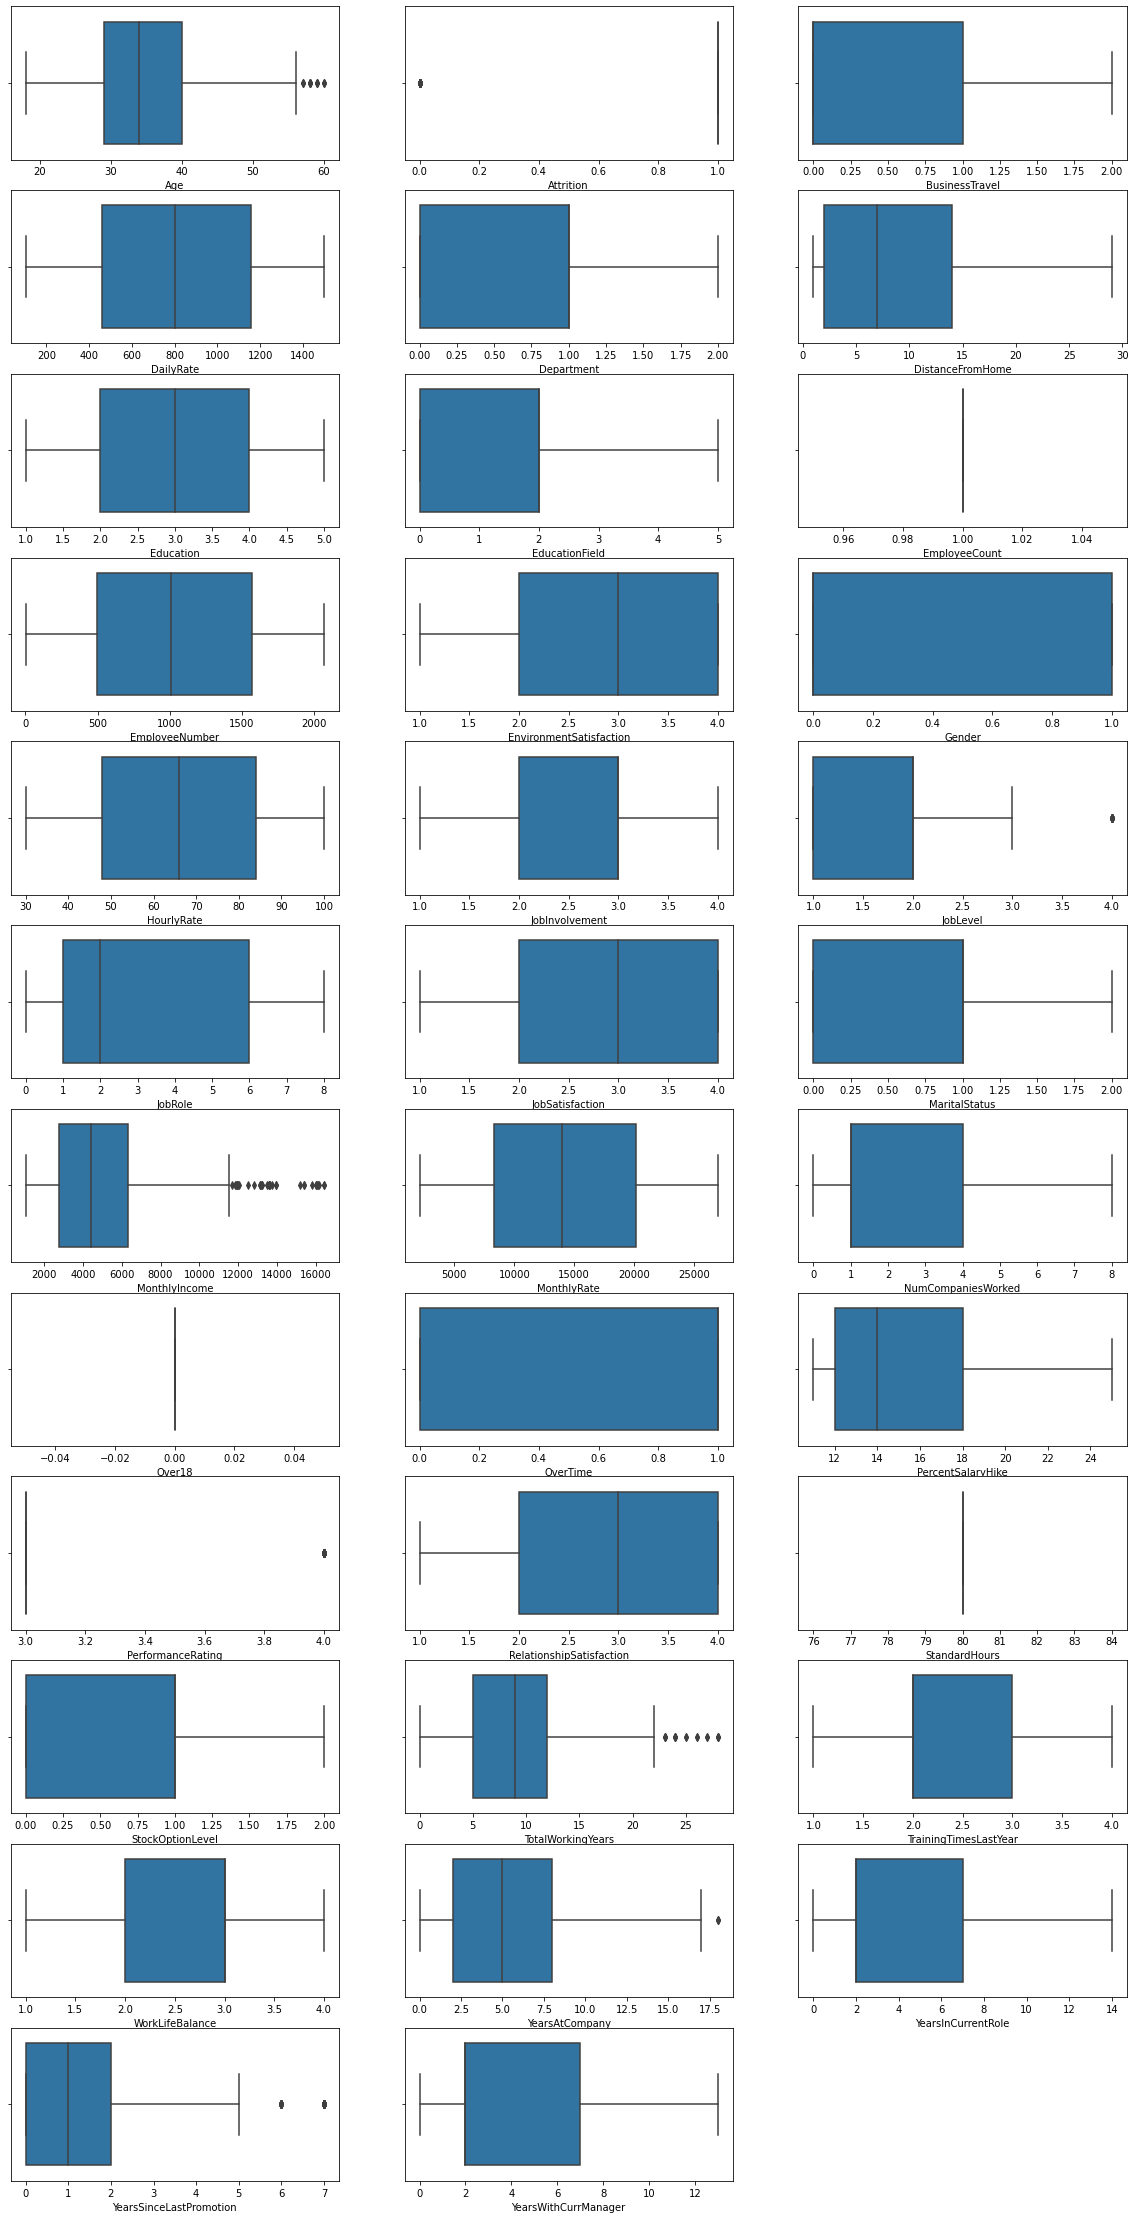

In [31]:
#Rechecking the outliers using boxplot
plt.figure(figsize=(20,40))
graph=1
for column in data:
    if graph <=36:
        ax=plt.subplot(12,3,graph)
        sns.boxplot(data[column],orient='v')
        plt.xlabel(column,fontsize=10)
    graph+=1
plt.show()  

.Now there are still some skewness in some features .we will deal with that later.                         

In [46]:
#spliting the dataset
x=data.drop('Attrition',axis=1)
y=data['Attrition']

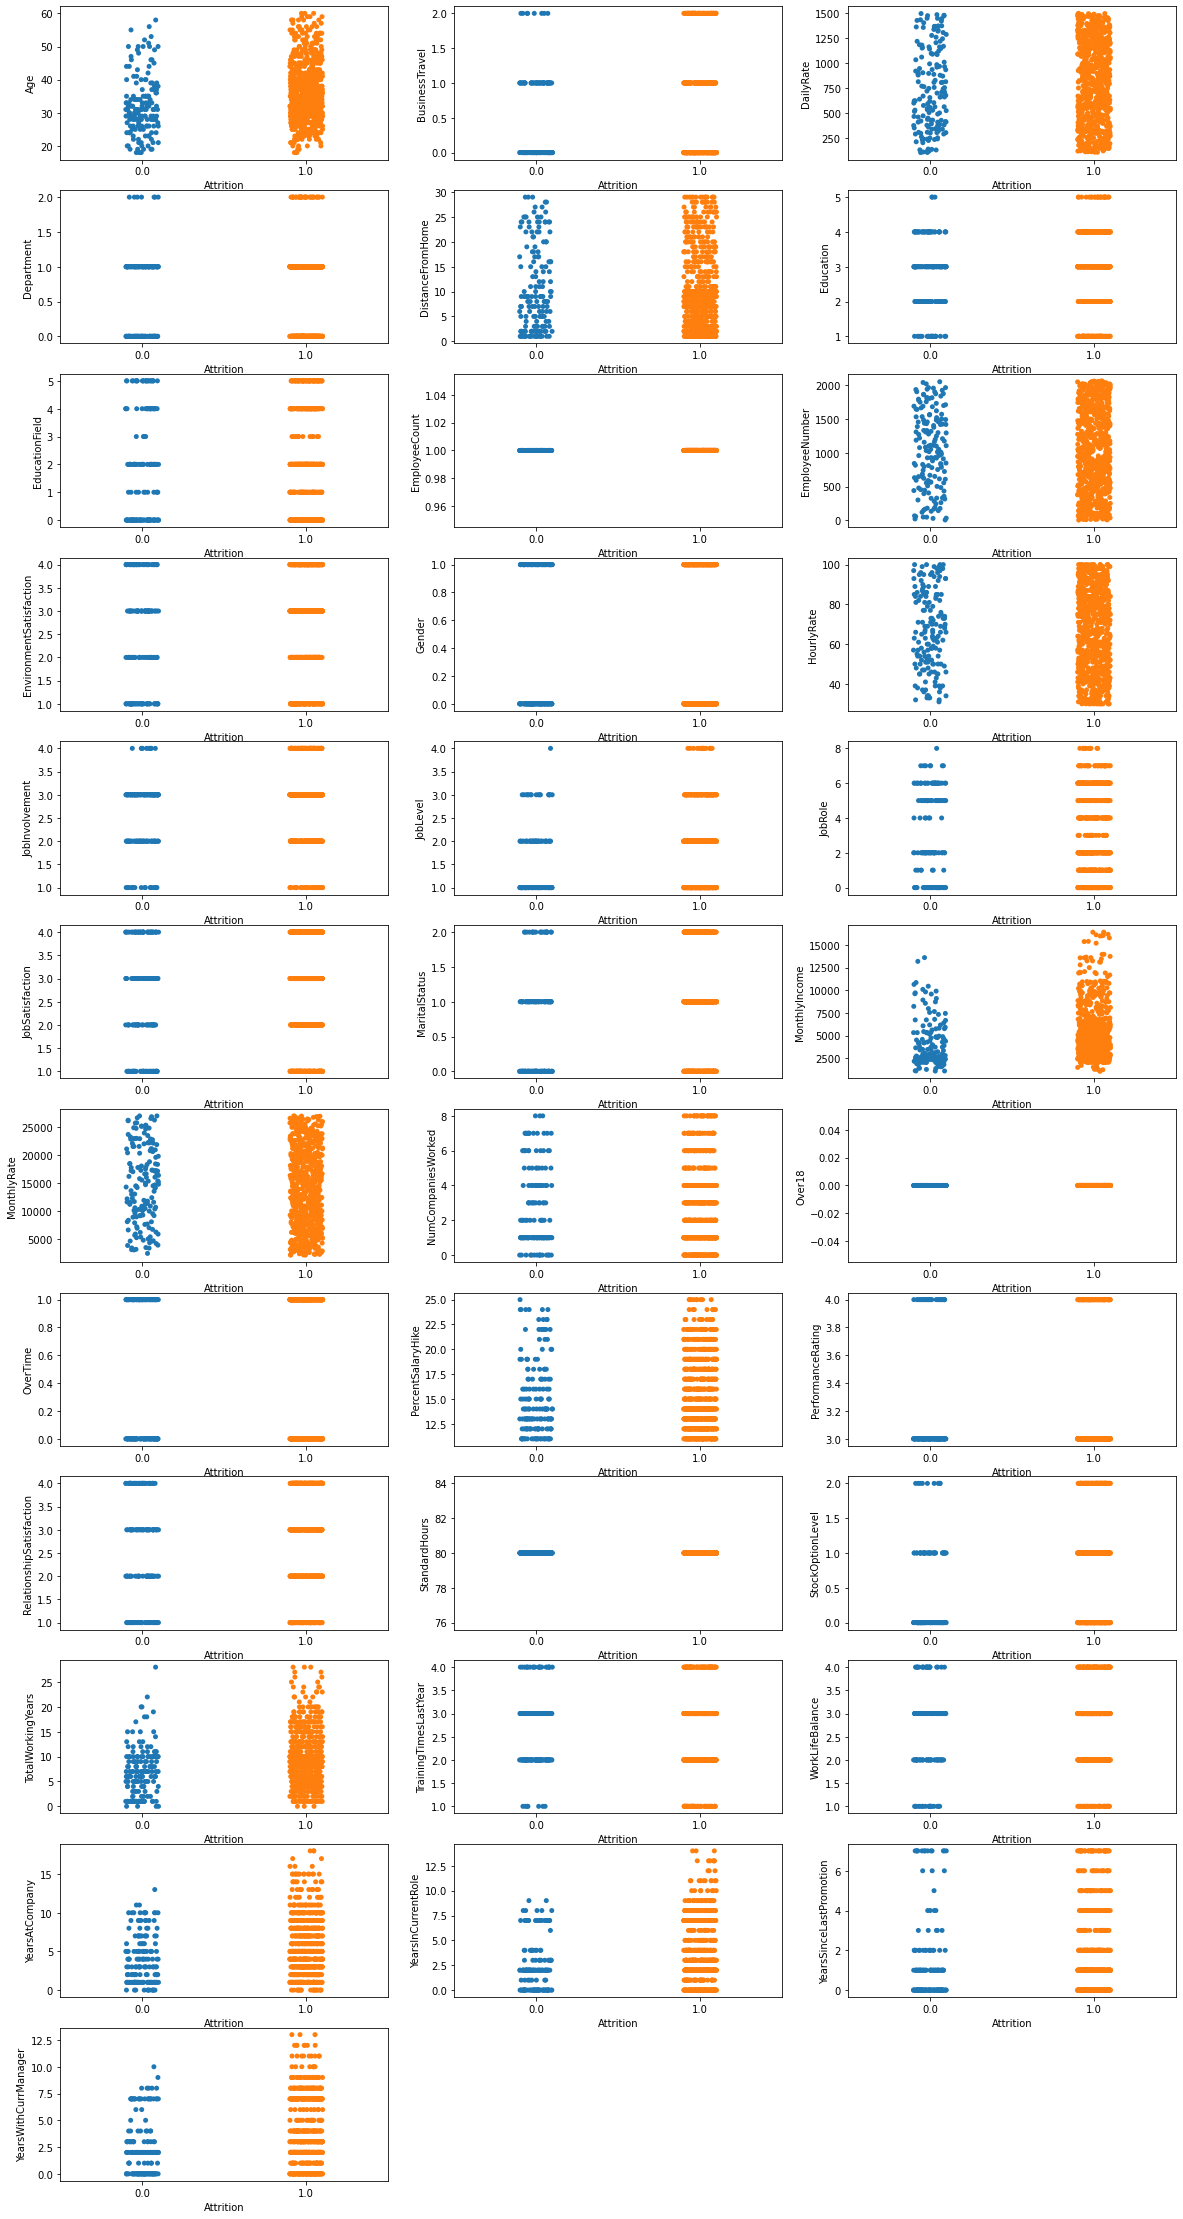

In [52]:
#To check imbalancy
plt.figure(figsize=(20,40))
plotnumber=1
for column in x:
    if plotnumber <=36:
        ax=plt.subplot(12,3,plotnumber)
        sns.stripplot(y,x[column])
    plotnumber+=1
plt.show()  

.We got approx equal number of class in label.so, we can say that data is balanced set .                        

In [64]:
#Data Scaling
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [35]:
#Using VIF to check the multicollinearity.                   
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif['Features']=x.columns
vif

,vif,Features
0,1.647286,Age
1,1.021331,BusinessTravel
2,1.047000,DailyRate
3,1.197472,Department
4,1.041775,DistanceFromHome
5,1.092349,Education
6,1.082578,EducationField
7,NaN,EmployeeCount
8,1.050067,EmployeeNumber
9,1.040043,EnvironmentSatisfaction


In [63]:
#If we saw the realtion betwwen these features and label then its looking that MonthlyIncome  and YearsAtCompany has strong relationship then JobLevel
x=x.drop(columns=['JobLevel'])
x

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1,49,1.0,279,1.0,8,1,0.0,1,2,3,...,4,80,1,10,3,3,10,7,1,7
2,37,0.0,1373,1.0,2,2,1.0,1,4,4,...,2,80,0,7,3,3,0,0,0,0
3,33,1.0,1392,1.0,3,4,0.0,1,5,4,...,3,80,0,8,3,3,8,7,3,0
5,32,1.0,1005,1.0,2,2,0.0,1,8,4,...,3,80,0,8,2,2,7,7,3,6
7,30,0.0,1358,1.0,24,1,0.0,1,11,4,...,2,80,1,1,2,3,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1463,31,2.0,325,1.0,5,3,2.0,1,2057,2,...,2,80,0,10,2,3,9,4,1,7
1464,26,0.0,1167,0.0,5,3,1.0,1,2060,4,...,4,80,0,5,2,3,4,2,0,0
1465,36,1.0,884,1.0,23,2,2.0,1,2061,3,...,3,80,1,17,3,3,5,2,0,3
1468,49,1.0,1023,0.0,2,3,2.0,1,2065,4,...,4,80,0,17,3,2,9,6,0,8


In [66]:
#splitting into train and test data
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=300)

In [67]:
#Building model
log_reg=LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression()

In [68]:
y_pred=log_reg.predict(x_test)

In [69]:
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.8491379310344828

.Model fits 84 % of test data.                  

In [70]:
#confusion matrix
conf_mat=confusion_matrix(y_test,y_pred)
conf_mat

array([[ 19,  28],
       [  7, 178]], dtype=int64)

In [71]:
true_positive=conf_mat[0][0]
false_positive=conf_mat[0][1]
false_negative=conf_mat[1][0]
true_negative=conf_mat[1][1]

In [72]:
#Precision
Precision=(true_positive)/(true_positive+false_positive)
Precision

0.40425531914893614

In [73]:
#RECALL
Recall=(true_positive)/(true_positive+false_negative)
Recall

0.7307692307692307

In [74]:
#F1 score
F1_score=2*(Recall*Precision)/(Recall+Precision)
F1_score

0.5205479452054794

In [75]:
#Area Under Curve
auc=roc_auc_score(y_test,y_pred)
auc

0.6832087406555492

.Using KNN model                  

In [79]:
#Using SelectKBest feature Selection Method
from sklearn.feature_selection import SelectKBest,f_classif

In [81]:
x=data.drop(columns=['Attrition','JobLevel'],axis=1)
y=data.Attrition

In [83]:
best_features=SelectKBest(score_func=f_classif,k=20)
fit=best_features.fit(x,y)
data_scores=pd.DataFrame(fit.scores_)
data_columns=pd.DataFrame(x.columns)

#concate dataframes
feature_scores=pd.concat([data_columns,data_scores],axis=1)
feature_scores.columns=['Feature_Name','score']

print(feature_scores.nlargest(20,'score'))

                Feature_Name      score
20                  OverTime  51.960333
25          StockOptionLevel  45.603765
26         TotalWorkingYears  35.124859
29            YearsAtCompany  33.586094
15             MaritalStatus  29.511826
0                        Age  26.941850
30        YearsInCurrentRole  25.769267
32      YearsWithCurrManager  25.347650
16             MonthlyIncome  25.197105
12            JobInvolvement  16.807919
9    EnvironmentSatisfaction  12.172122
14           JobSatisfaction  10.811609
4           DistanceFromHome   6.555611
23  RelationshipSatisfaction   5.922420
2                  DailyRate   3.850149
28           WorkLifeBalance   3.570856
6             EducationField   3.064845
3                 Department   2.858132
17               MonthlyRate   1.981152
5                  Education   1.273783


In [84]:
new_x=data[['OverTime','StockOptionLevel','TotalWorkingYears','YearsAtCompany','MaritalStatus','Age','YearsInCurrentRole','YearsWithCurrManager','MonthlyIncome','JobInvolvement','EnvironmentSatisfaction','JobSatisfaction','DistanceFromHome','RelationshipSatisfaction','DailyRate','WorkLifeBalance','EducationField','Department','MonthlyRate','Education']]
new_x

,OverTime,StockOptionLevel,TotalWorkingYears,YearsAtCompany,MaritalStatus,Age,YearsInCurrentRole,YearsWithCurrManager,MonthlyIncome,JobInvolvement,EnvironmentSatisfaction,JobSatisfaction,DistanceFromHome,RelationshipSatisfaction,DailyRate,WorkLifeBalance,EducationField,Department,MonthlyRate,Education
1,1.0,1,10,10,1.0,49,7,7,5130,2,3,2,8,4,279,3,0.0,1.0,24907,1
2,0.0,0,7,0,0.0,37,0,0,2090,2,4,3,2,2,1373,3,1.0,1.0,2396,2
3,0.0,0,8,8,1.0,33,7,0,2909,3,4,3,3,3,1392,3,0.0,1.0,23159,4
5,1.0,0,8,7,0.0,32,7,6,3068,3,4,4,2,3,1005,2,0.0,1.0,11864,2
7,1.0,1,1,1,2.0,30,0,0,2693,3,4,3,24,2,1358,3,0.0,1.0,13335,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1463,1.0,0,10,9,0.0,31,4,7,9936,3,2,1,5,2,325,3,2.0,1.0,3787,3
1464,1.0,0,5,4,0.0,26,2,0,2966,2,4,3,5,4,1167,3,1.0,0.0,21378,3
1465,1.0,1,17,5,1.0,36,2,3,2571,4,3,4,23,3,884,3,2.0,1.0,12290,2
1468,1.0,0,17,9,1.0,49,6,8,5390,2,4,2,2,4,1023,2,2.0,0.0,13243,3


In [85]:
#Data scaling
scaler=StandardScaler()
x_scaled=scaler.fit_transform(new_x)

In [86]:
#Building Model to test unexposed data
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=330)

knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)

In [87]:
cfm=confusion_matrix(y_test,y_pred)
cfm

array([[  7,  31],
       [  9, 185]], dtype=int64)

In [89]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

         0.0       0.44      0.18      0.26        38
         1.0       0.86      0.95      0.90       194

    accuracy                           0.83       232
   macro avg       0.65      0.57      0.58       232
weighted avg       0.79      0.83      0.80       232



.KNN model fits 83% of data.              

In [95]:
#Using cross validation score to check overfitting
from sklearn.model_selection import KFold,cross_val_score
cross_val_score(knn,x_scaled,y,cv=5)

array([0.82702703, 0.84864865, 0.83243243, 0.82702703, 0.84864865])

In [96]:
cross_val_score(KNeighborsClassifier(),x_scaled,y,cv=5).mean()

0.8367567567567568

AS the model eariler value is approx same i.e. 83% .so, model is not overfitted.                           

In [97]:
#Doing Hyperparameter tunning using GridSearchCV
from sklearn.model_selection import GridSearchCV

In [105]:
param_grid={'algorithm':['kd_tree','brute'],
            'leaf_size':[15,18,20],
            'n_neighbors':[3,5,7,15]
           }

In [106]:
gridsearch=GridSearchCV(estimator=knn,param_grid=param_grid)

In [107]:
gridsearch.fit(x_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['kd_tree', 'brute'],
                         'leaf_size': [15, 18, 20],
                         'n_neighbors': [3, 5, 7, 15]})

In [108]:
gridsearch.best_params_

{'algorithm': 'kd_tree', 'leaf_size': 15, 'n_neighbors': 7}

In [111]:
#Now using this best parameter and check wheather accuracy is increasing or not
knn=KNeighborsClassifier(algorithm='kd_tree',leaf_size=15,n_neighbors=7)

In [112]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=15, n_neighbors=7)

In [113]:
y_pred=knn.predict(x_test)

In [114]:
#confusion matrix
cfm=confusion_matrix(y_test,y_pred)
cfm

array([[  4,  34],
       [  8, 186]], dtype=int64)

In [115]:
print(classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

         0.0       0.33      0.11      0.16        38
         1.0       0.85      0.96      0.90       194

    accuracy                           0.82       232
   macro avg       0.59      0.53      0.53       232
weighted avg       0.76      0.82      0.78       232



As earlier also we got the same accuracy. so, this is the best accuracy we have.             

In [116]:
#saving the model
import pickle
with open('modelForPrediction.sav','wb') as f:
    pickle.dump(log_reg,f)

In [117]:
#saving the model
import pickle
with open('modelForPrediction.sav','wb') as f:
    pickle.dump(knn,f)